#### ETL - DADOS INSTAGRAM:

O objetivo deste algoritmo ETL é coletar dados relevantes do Instagram disponíveis no site BusinessOfApps, como visualizações de receita e usuários. Para isso, é utilizada a biblioteca Selenium para extrair os dados de tabelas e gráficos dinâmicos. Em seguida, o processamento é feito com o auxílio de Pandas e bibliotecas Python nativas. Por fim, os dados são exportados em formato CSV para viabilizar a análise e visualização em outros softwares.

A diretoria da BusinessOfApps concedeu autorização para este projeto de raspagem de dados/ETL.


#### INICIALIZAÇÃO:

In [18]:
# INICIALIZAR BIBLIOTECAS E PARÂMETROS ESSENCIAIS
# extração:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.firefox.options import Options
from time import sleep
# transformação:
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
# preview e finalização:
import seaborn as sns
import matplotlib.pyplot as plt
import os

print('bibliotecas importadas.')
# ----------------------------------------------------------------------------------------


# URL-alvo:
target = 'https://www.businessofapps.com/data/instagram-statistics/' # fonte de dados.


# DataFrames:
dataG1   =  pd.DataFrame() # para armazenar dados do 1° gráfico.
dataG2   =  pd.DataFrame() # para armazenar dados do 2° gráfico.
dataTb1  =  pd.DataFrame() # para armazenar dados da 1° tabela.
dataTb2  =  pd.DataFrame() # para armazenar dados da 2° tabela.
dataTb3  =  pd.DataFrame() # para armazenar dados da 3° tabela.


# parâmetros para extração (gráficos):
graficos=[
{   
            'gID'    :  'dataG1', # id interno para este objeto.
            'title'  :  'Instagram estimated revenues', # id/title do gráfico dentro do código-fonte do target.
            'xpath'  :  '/html/body/div[3]/div/div[2]/div[1]/div/div[2]', # localização do dado a ser extraído. 
            'col'    :  'receita(milhoes)', # nome da coluna do DataFrame que será criada para armazenar os dados.
            'range'  :  range(31, 0, -1), # configuração do intervalo utilizado para executar a automação de extração. 
            'df'     :  dataG1, # DataFrame deste objeto.
            'expt'   :  'fReceitaInstagram' # nome final para o arquivo exportado.
}
,
{
            'gID'    :  'dataG2',
            'title'  :  'Instagram monthly app users',
            'xpath'  :  '/html/body/div[3]/div/div[2]/div[1]/div/div[2]',
            'col'    :  'usuarios(milhoes)',
            'range'  :   range(39, 0, -1),
            'df'     :   dataG2,
            'expt'   :  'fUsuariosInstagram'
}      
]
# parâmetros para extração (tabelas):
tabelas=[
{
            'tID'    :  'dataTb1',
            'name'   :  'footable_76101', # id/name da tabela dentro do código-fonte do target.
            'col'    :  ['regiao','usuarios'],
            'df'     :  dataTb1,
            'expt'   :  'dRegiaoInstagram'

}
,
{
            'tID'    :  'dataTb2',
            'name'   :  'footable_76102',
            'col'    :  ['idade','percentual'],
            'df'     :  dataTb2,
            'expt'   :  'dIdadeInstagram'
}
,
{
            'tID'    :  'dataTb3',
            'name'   :  'footable_76104',
            'col'    :  ['genero','percentual'], 
            'df'     :  dataTb3,
            'expt'   :  'dGeneroInstagram'
}
]

# parâmetros para tema Seaborn:
tknt={

            'axes.facecolor'    :  '#0d1117',   # define cor de fundo da área do gráfico.
            'figure.facecolor'  :  '#0d1117',   # define cor de fundo da janela do gráfico.
            'axes.grid'         :   False,      # desativa a grid. 
            'axes.edgecolor'    :  '#9aa5ce',   # define cor das bordas.
            'axes.labelcolor'   :  '#9aa5ce',   # define cor dos rótulos
            'grid.color'        :  '#9aa5ce',   # define cor da grid.
            'grid.linestyle'    :  '-',         # define estilo de linha da grid
            'text.color'        :  '#9aa5ce',   # define cor de textos
            'xtick.color'       :  '#9aa5ce',   # define cor de marcador do eixo x 
            'ytick.color'       :  '#9aa5ce',   # define cor de marcador de eixo y
}
sns.set_theme(rc = tknt)


# parâmetros para exportação:
path_name     =  "DataBase"  # nome do diretório
exptGraficos  =  False       # verificador final da extração dos dados Gráficos
exptTabelas   =  False       # verificador final da extração dos dados Tabelas


print('parâmetros de inicialização definidos.')
print('\nDataFrames criados:\ndataG1   :  para armazenar dados do 1° gráfico.\ndataG2   :  para armazenar dados do 2° gráfico.\ndataTb1  :  para armazenar dados da 1° tabela.\ndataTb2  :  para armazenar dados da 2° tabela.\ndataTb3  :  para armazenar dados da 3° tabela.\n')

bibliotecas importadas.
parâmetros de inicialização definidos.

DataFrames criados:
dataG1   :  para armazenar dados do 1° gráfico.
dataG2   :  para armazenar dados do 2° gráfico.
dataTb1  :  para armazenar dados da 1° tabela.
dataTb2  :  para armazenar dados da 2° tabela.
dataTb3  :  para armazenar dados da 3° tabela.



In [19]:
# EXECUTAR WEBDRIVER
print('incializando o webdriver...\n')

try:    
    op = Options(); op.add_argument('-headless')
    driver = webdriver.Firefox(options=op)
except Exception as e:
    print('erro ao abrir o webdriver: ',e)

try:
    print( 'webdriver inicializado com sucesso.')
    driver.get(target)
    driver.implicitly_wait(5) 
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);"); sleep(5)
    print('fonte de dados/URL_alvo carregada com sucesso.')
except Exception as e: 
    print('algoritmo não iniciado, webdriver não está funcionando corretamente: ',e)

incializando o webdriver...

webdriver inicializado com sucesso.
fonte de dados/URL_alvo carregada com sucesso.


#### EXTRAÇÃO:

In [20]:
#  LOCALIZAR DADOS: GRÁFICOS 
print('localizando dados (gráficos)...\n')

try:
    for grafico in graficos:
        title = grafico['title']
        findGrafico = driver.find_element(By.XPATH, f"//iframe[@title='{title}']")
        print(f'gráfico localizado com sucesso: "{title}"')
    print('\ndados-alvo contidos em gráficos localizados.')
except Exception as e:
    print(f'erro ao localizar dados:\n',e)

localizando dados (gráficos)...

gráfico localizado com sucesso: "Instagram estimated revenues"
gráfico localizado com sucesso: "Instagram monthly app users"

dados-alvo contidos em gráficos localizados.


In [21]:
#  LOCALIZAR DADOS: TABELAS
print('localizando dados (tabelas)...\n')

try:
    for tabela in tabelas:
        name = tabela['name']
        findTabela = driver.find_element(By.ID, name)
        print(f'tabela localizada com sucesso: "{name}"')
    print('\ndados-alvo contidos em tabelas localizados.')
except Exception as e:
    print(f'erro ao localizar dados:\n',e)

localizando dados (tabelas)...

tabela localizada com sucesso: "footable_76101"
tabela localizada com sucesso: "footable_76102"
tabela localizada com sucesso: "footable_76104"

dados-alvo contidos em tabelas localizados.


In [22]:
# EXTRAIR DADOS: GRÁFICOS
print('extraindo dados (gráficos)...\n')
print('   df  |                       raspagem                          |  dt  ')

def extrairGraficos(numGrafico,totalGraficos):
    idx = (numGrafico - 1) % totalGraficos
    extracaoGraficos = graficos[idx]
    extraidos = []

    try:
        moveto_graficos = driver.find_element(By.XPATH, f"//iframe[@title='{extracaoGraficos['title']}']")
        driver.execute_script('arguments[0].scrollIntoView();', moveto_graficos); sleep(6)
        driver.switch_to.frame(moveto_graficos)

    except Exception as e:
        print('erro ao executar automação: ',e)

    try:
        for i in extracaoGraficos['range']:
            sleep(0.3)
            iframeGrafico = driver.find_element(By.CSS_SELECTOR, f'path.igc-column:nth-child({i})')
            ActionChains(driver).move_to_element(iframeGrafico).perform()
            sleep(0.3)
            extraido = driver.find_element(By.XPATH, (extracaoGraficos['xpath'])).text
            extraidos.append(extraido)
            print(f'{extracaoGraficos["gID"]}   dado extraído do gráfico "{extracaoGraficos["title"]}"   {extraido}')

        extracaoGraficos['df'][extracaoGraficos['col']] = extraidos
        driver.switch_to.default_content() 
    except Exception as e:
        print('erro ao executar automação de extração: ',e)
               
if dataG1.empty:
    extrairGraficos(1,2)
    if dataG2.empty:
        extrairGraficos(2,2)
        if  dataG1.empty and dataG2.empty:
            print('\nhá dados pendentes de extração.')            
        else:
            print('\ndados-alvo contidos em gráficos foram extraídos.') 

extraindo dados (gráficos)...

   df  |                       raspagem                          |  dt  
dataG1   dado extraído do gráfico "Instagram estimated revenues"   12194
dataG1   dado extraído do gráfico "Instagram estimated revenues"   12681
dataG1   dado extraído do gráfico "Instagram estimated revenues"   12000
dataG1   dado extraído do gráfico "Instagram estimated revenues"   14140
dataG1   dado extraído do gráfico "Instagram estimated revenues"   12186
dataG1   dado extraído do gráfico "Instagram estimated revenues"   11920
dataG1   dado extraído do gráfico "Instagram estimated revenues"   9388
dataG1   dado extraído do gráfico "Instagram estimated revenues"   8732
dataG1   dado extraído do gráfico "Instagram estimated revenues"   6835
dataG1   dado extraído do gráfico "Instagram estimated revenues"   5899
dataG1   dado extraído do gráfico "Instagram estimated revenues"   5375
dataG1   dado extraído do gráfico "Instagram estimated revenues"   6016
dataG1   dado extraído do 

In [23]:
# EXTRAIR DADOS: TABELAS
print('extraindo dados (tabelas)...\n')

def extrairtabelas(numTabela,totaltabelas):

    idx = (numTabela - 1) % totaltabelas # calcula o índice da tabela a ser extraída
    infoTabela = tabelas[idx] # obtém informações da tabela a ser extraída
    
    tabela = driver.find_element(By.ID, (infoTabela['name'])) # encontra a tabela na página
    linhas = tabela.find_elements(By.TAG_NAME, "tr") # encontra as linhas da tabela
    
    for i, col in enumerate(infoTabela["col"]): # iterando sobre as colunas da tabela especificada e obtendo o índice e o valor de cada coluna
        extracaotabelas = [] # inicializando a lista vazia para armazenar os dados extraídos das colunas
        for linha in linhas: # iterando sobre as linhas da tabela
            celulas = linha.find_elements(By.TAG_NAME, "td") # encontrando as células (tag "td") de cada linha
            
            if len(celulas) > i: # verificando se há mais células na linha do que o índice da coluna atual
               extracaotabelas.append(celulas[i].text) # se houver, o texto contido na célula é adicionado à lista "extracaotabelas"

        infoTabela['df'][col] = extracaotabelas # adiciona os dados da coluna à informação da tabela
        print(f'{infoTabela["tID"]} - dados da tabela {infoTabela["name"]} foram extraídos e alocados no DataFrame, dados extraídos: {extracaotabelas}')
if dataTb1.empty:
    extrairtabelas(1,3)
    if dataTb2.empty:
        extrairtabelas(2,3)
        if dataTb3.empty:
            extrairtabelas(3,3)
            if not dataTb1.empty and not dataTb2.empty and not dataTb3.empty:
                print('\ndados-alvo contidos em tabelas foram extraídos.')

extraindo dados (tabelas)...

dataTb1 - dados da tabela footable_76101 foram extraídos e alocados no DataFrame, dados extraídos: ['Asia-Pacific', 'Europe', 'South America', 'North America', 'Middle East', 'Africa', 'Australia']
dataTb1 - dados da tabela footable_76101 foram extraídos e alocados no DataFrame, dados extraídos: ['893', '338', '289', '222', '112', '96', '22']
dataTb2 - dados da tabela footable_76102 foram extraídos e alocados no DataFrame, dados extraídos: ['13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
dataTb2 - dados da tabela footable_76102 foram extraídos e alocados no DataFrame, dados extraídos: ['7', '30', '33', '16', '8', '4', '2']
dataTb3 - dados da tabela footable_76104 foram extraídos e alocados no DataFrame, dados extraídos: ['Male', 'Female']
dataTb3 - dados da tabela footable_76104 foram extraídos e alocados no DataFrame, dados extraídos: ['49.2', '50.8']

dados-alvo contidos em tabelas foram extraídos.


In [24]:
# ENCERRAR WEBDRIVER
print('etapa de extração concluída, encerrando webdriver... ')

try:
    driver.close()
    print('webdriver encerrado.')
except Exception as e:
    print(' \n Não foi possível encerrar o webdriver corretamente. (Firefox.exe - Webdriver)\n', e)

etapa de extração concluída, encerrando webdriver... 
webdriver encerrado.


#### TRANSFORMAÇÃO:

In [25]:
# TRANSFORMAR DADOS: GRÁFICOS (FORMATANDO VALORES DA COLUNA DE RECEITA)
print(f'transformando dados dos DataFrames: {graficos[0].get("gID")} e {graficos[1].get("gID")} (formatos)...')

for grafico in graficos:
    df  = grafico.get('df')
    col = grafico.get('col')
    gID = grafico.get('gID')

    try:
        if df[col].dtype != 'int64': # tarefa 1: tratar tipos 
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f'{gID}: dados da coluna "{col}" foram transformados para o formato númerico com sucesso.')
  
        else:
            print(f'{gID}: dados da coluna "{col}" já é do tipo númerico, sem necessidade de transformação.')
    except Exception as e:
        print(f'{gID}: erro ao transformar ou localizar dados da coluna "{col}"\n.', e)

transformando dados dos DataFrames: dataG1 e dataG2 (formatos)...
dataG1: dados da coluna "receita(milhoes)" foram transformados para o formato númerico com sucesso.
dataG2: dados da coluna "usuarios(milhoes)" foram transformados para o formato númerico com sucesso.


In [26]:
# TRANSFORMAR DADOS: GRÁFICOS (DATAS DE FECHAMENTO TRIMESTRAL)
print(f'transformando dados dos DataFrames: {graficos[0].get("gID")} e {graficos[1].get("gID")} (datas de fechamento)...')

def gerarFechamentos(inicio: date, trimestres: int, dataframe: pd.DataFrame) -> pd.DataFrame:
    datasFechamento = []

    try:
        for i in range(trimestres):
            fechamento = inicio + relativedelta(day = 31, months = 2)
            datasFechamento.append(fechamento.strftime('%d-%m-%Y'))
            inicio -= relativedelta(months = 3)
    except Exception as e:
        print('erro ao gerar datas de fechamento trimestral:', e)

    dataframe['fechamento'] = pd.to_datetime(datasFechamento, format='%d-%m-%Y')
    return dataframe
inicio = date(2022, 7, 31)
dataG1 = gerarFechamentos(inicio, 31, dataG1)
if dataG1['fechamento'].dtype == 'datetime64[ns]':
    print(f'{graficos[0].get("gID")}: datas de fechamento trimestral geradas com sucesso para o DataFrame.')
    dataG2 = gerarFechamentos(inicio, 39, dataG2)
    if dataG2['fechamento'].dtype == 'datetime64[ns]':
        print(f'{graficos[1].get("gID")}: datas de fechamento trimestral geradas com sucesso para o DataFrame.')

transformando dados dos DataFrames: dataG1 e dataG2 (datas de fechamento)...
dataG1: datas de fechamento trimestral geradas com sucesso para o DataFrame.
dataG2: datas de fechamento trimestral geradas com sucesso para o DataFrame.


In [27]:
# TRANSFORMAR DADOS: TABELA 1 (TRATAMENTO DE FORMATOS)
print(f'transformando dados dos DataFrame: {tabelas[0].get("tID")} (formatações e tratamentos)...\n')

try: # tarefa 1: traduzir conteúdo da 1° coluna
    regiaoPTBR = False
    dataTb1['regiao'] = dataTb1['regiao'].replace({
              
        'Africa'          :   'África', 
        'Asia-Pacific'    :   'Ásia-Pacífico', 
        'Europe'          :   'Europa', 
        'North America'   :   'América do Norte', 
        'South America'   :   'América do Sul', 
        'Australia'       :   'Austrália', 
        'Middle East'     :   'Oriente Médio' 
    })
    regiaoPTBR = True
    print(f'{tabelas[0].get("tID")}: dados da coluna "{tabelas[0].get("col")[0]}" traduzidos para o português com sucesso.')
except Exception as e:
    print(f'{tabelas[0].get("tID")}: erro ao traduzir ou localizar dados da coluna "{tabelas[0].get("col")[0]}":', e)
    
    
try: # tarefa 2: tratar tipos da 2° coluna
    if dataTb1[tabelas[0].get("col")[1]].dtype != 'int64':
        dataTb1[tabelas[0].get("col")[1]] = pd.to_numeric(dataTb1[tabelas[0].get("col")[1]], errors='coerce')
        print(f'{tabelas[0].get("tID")}: dados da coluna "{tabelas[0].get("col")[1]}" foram transformados para o formato númerico com sucesso.')

    else:
        print(f'{tabelas[0].get("tID")}: dados da coluna "{tabelas[0].get("col")[1]}" já é do tipo númerico, sem necessidade de transformação.')

except Exception as e:
    print(f'{tabelas[0].get("tID")}: erro ao transformar ou localizar dados da coluna "{tabelas[0].get("col")[1]}"\n.', e)

if regiaoPTBR == True and dataTb1[tabelas[0].get("col")[1]].dtype == 'int64':
    print(f'\n{tabelas[0].get("tID")}: todos os dados do DataFrame foram transformados com sucesso e estão prontos para uso.')
else:
    print(f'\n{tabelas[0].get("tID")}: dados do DataFrame não foram transformados completamente e não estão prontos para uso.')

transformando dados dos DataFrame: dataTb1 (formatações e tratamentos)...

dataTb1: dados da coluna "regiao" traduzidos para o português com sucesso.
dataTb1: dados da coluna "usuarios" foram transformados para o formato númerico com sucesso.

dataTb1: todos os dados do DataFrame foram transformados com sucesso e estão prontos para uso.


In [28]:
# TRANSFORMAR DADOS: TABELA 2 (TRATAMENTO DE FORMATOS)
print(f'transformando dados dos DataFrame: {tabelas[1].get("tID")} (formatações e tratamentos)...\n')

print(f'{tabelas[1].get("tID")}: coluna "{tabelas[1].get("col")[0]}" já é do tipo str, sem necessidade de transformação.')

if dataTb2[tabelas[1].get("col")[1]].dtype != 'float': # tarefa 1: tratar tipos da 2° coluna
    try:
        dataTb2[tabelas[1].get("col")[1]] = pd.to_numeric(dataTb2[tabelas[1].get("col")[1]], errors='coerce')
        dataTb2[tabelas[1].get("col")[1]] = (dataTb2[tabelas[1].get("col")[1]]*100)/100
        print(f'{tabelas[1].get("tID")}: coluna "{tabelas[1].get("col")[1]}" transformada para o tipo % com sucesso.')

    except Exception as e:
        print(f'{tabelas[1].get("tID")}: não foi possível transformar ou localizar os dados da coluna "{tabelas[1].get("col")[1]}"\n.', e)
else:
    print(f'{tabelas[1].get("tID")}: coluna "{tabelas[1].get("col")[1]}" já é do tipo %, sem necessidade de transformação.')

transformando dados dos DataFrame: dataTb2 (formatações e tratamentos)...

dataTb2: coluna "idade" já é do tipo str, sem necessidade de transformação.
dataTb2: coluna "percentual" transformada para o tipo % com sucesso.


In [29]:
# TRANSFORMAR DADOS: TABELA 3 (TRATAMENTO DE FORMATOS)
print(f'transformando dados dos DataFrame: {tabelas[2].get("tID")} (formatações e tratamentos)...\n')

try: # tarefa 1: traduzir conteúdo da 1° coluna
    dataTb3['genero'] = dataTb3['genero'].replace({
              
        'Male'      :   'Masculino', 
        'Female'    :   'Feminino'
    })
    task1_dataTb3 = True
    print(f'{tabelas[2].get("tID")}: dados da coluna "{tabelas[2].get("col")[0]}" traduzidos para o português com sucesso.')
except Exception as e:
    print(f'{tabelas[2].get("tID")}: erro ao traduzir ou localizar dados da coluna "{tabelas[2].get("col")[0]}":', e)
print(f'{tabelas[2].get("tID")}: coluna "{tabelas[2].get("col")[0]}" já é do tipo str, sem necessidade de transformação.')   


if dataTb3[tabelas[2].get("col")[1]].dtype != 'float': # tarefa 2: tratar tipos da 2° coluna
    try:
        dataTb3[tabelas[2].get("col")[1]] = pd.to_numeric(dataTb3[tabelas[2].get("col")[1]], errors='coerce')
        dataTb3[tabelas[2].get("col")[1]] = (dataTb3[tabelas[2].get("col")[1]]*100)/100
        print(f'{tabelas[2].get("tID")}: coluna "{tabelas[2].get("col")[1]}" transformada para o tipo % com sucesso.')        
        task2_dataTb3 = True
    except Exception as e:
        print(f'{tabelas[2].get("tID")}: não foi possível transformar ou localizar os dados da coluna "{tabelas[2].get("col")[1]}"\n.', e)
else:
    print(f'{tabelas[2].get("tID")}: coluna "{tabelas[2].get("col")[1]}" já é do tipo %, sem necessidade de transformação.')

transformando dados dos DataFrame: dataTb3 (formatações e tratamentos)...

dataTb3: dados da coluna "genero" traduzidos para o português com sucesso.
dataTb3: coluna "genero" já é do tipo str, sem necessidade de transformação.
dataTb3: coluna "percentual" transformada para o tipo % com sucesso.


gerando dataviz de teste/preview dos dados referentes a dataG1 e dataG2...


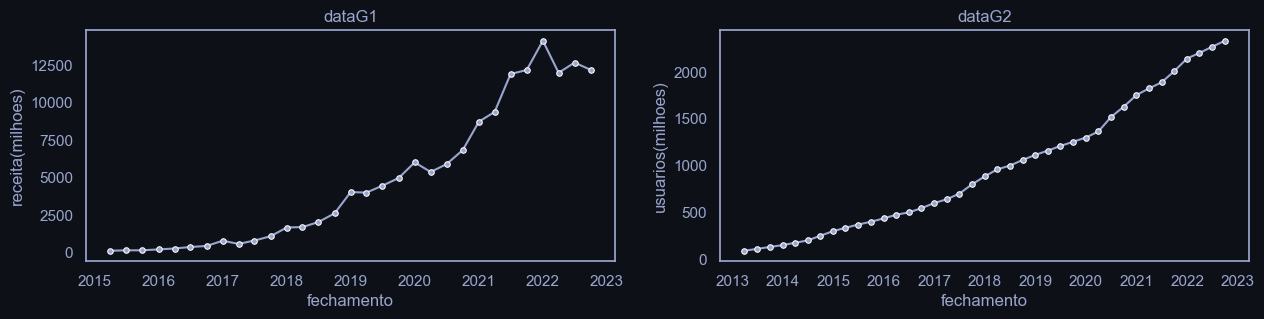

In [30]:
# DATAVIZ: DATAFRAME DAODS DOS GRÁFICOS
print(f'gerando dataviz de teste/preview dos dados referentes a {graficos[0].get("gID")} e {graficos[1].get("gID")}...')

try:  
    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º subplot
    v1 = sns.lineplot(data=graficos[0].get('df'), x='fechamento', y='receita(milhoes)', marker='o', markersize=4, markerfacecolor='#9aa5ce', color='#9aa5ce')
    v1.figure.set_size_inches(15, 3)
    plt.title(graficos[0].get("gID"))
except Exception as e:
    print(f"{graficos[0].get('gID')}: erro ao projetar gráfico:", e)

try:
    plt.subplot(1, 2, 2) 
    v2 = sns.lineplot(data=graficos[1].get('df'), x='fechamento', y='usuarios(milhoes)', marker='o', markersize=4, markerfacecolor='#9aa5ce', color='#9aa5ce')
    v2.figure.set_size_inches(15, 3)
    plt.title(graficos[1].get("gID"))
except Exception as e:
    print(f"{graficos[1].get('gID')}: erro ao projetar gráfico:", e)
plt.show()

gerando dataviz de teste/preview dos dados referentes a dataTb1, dataTb2 e dataTb3...


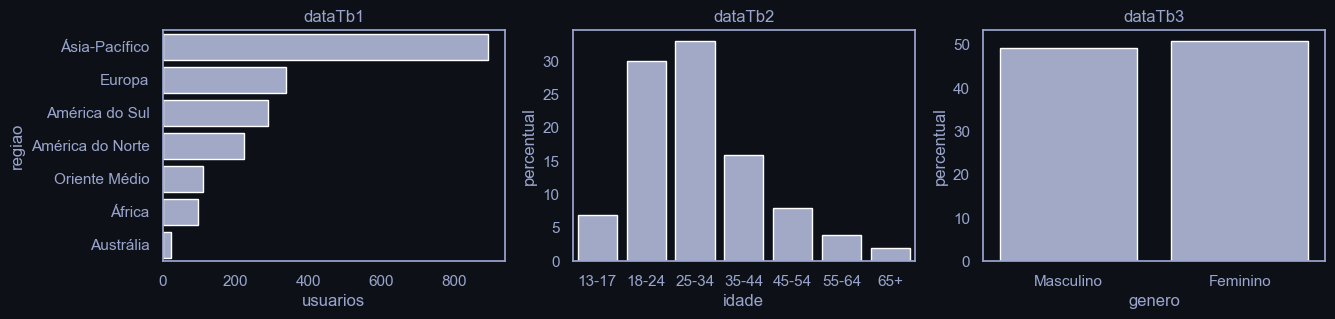

In [31]:
# DATAVIZ: DATAFRAME DAODS DAS TABELAS
print(f'gerando dataviz de teste/preview dos dados referentes a {tabelas[0].get("tID")}, {tabelas[1].get("tID")} e {tabelas[2].get("tID")}...')

try:
    plt.subplot(1, 3, 1) 
    v1 = sns.barplot(data=tabelas[0].get('df'), x='usuarios', y='regiao', color='#9aa5ce')
    v1.figure.set_size_inches(15, 3)
    plt.title(tabelas[0].get("tID"))
except Exception as e:
    print(f"{tabelas[0].get('tID')}: erro ao projetar o gráfico.\n",e)

try:
    plt.subplot(1, 3, 2) 
    v1 = sns.barplot(data=tabelas[1].get('df'), x='idade', y='percentual', color='#9aa5ce')
    v1.figure.set_size_inches(15, 3)
    plt.title(tabelas[1].get("tID"))
except Exception as e:
    print(f"{tabelas[1].get('tID')}: erro ao projetar o gráfico.\n",e)

try:
    plt.subplot(1, 3, 3)
    v1 = sns.barplot(data=tabelas[2].get('df'), x='genero', y='percentual', color='#9aa5ce')
    v1.figure.set_size_inches(15, 3)
    plt.title(tabelas[2].get("tID"))
except Exception as e:
    print(f"{tabelas[2].get('tID')}: erro ao projetar o gráfico:\n",e)

#### LOAD/CARREGAMENTO:

In [32]:
# LOAD: GRÁFICOS
print(f'Exportando dados...(gráficos - {graficos[0].get("gID")} e {graficos[1].get("gID")}) \n')

graficosTotal =  len(graficos)
graficosExpts =  0

if not os.path.exists(path_name):
    os.makedirs(path_name)

for i, grafico in enumerate(graficos):
    if grafico['df'].empty:
        print(f'O gráfico "{grafico["gID"]}" não foi exportado pois o DataFrame está vazio.')

    pth = os.path.join(path_name, f"{grafico['expt']}.csv")
    grafico['df'].to_csv(pth, index=False)
    graficosExpts += 1
    print(f'{grafico["gID"]}: exportado com sucesso como: "{grafico["expt"]}.csv" - {graficosExpts}/{graficosTotal}')

if graficosExpts == graficosTotal:
    exptGraficos = True
    print(f'\ndados exportados com sucesso e estão prontos para utilização no diretório: "{path_name}"')
else:
    print(f'\napenas {graficosExpts} gráficos de {graficosTotal} foram exportados.')

Exportando dados...(gráficos - dataG1 e dataG2) 

dataG1: exportado com sucesso como: "fReceitaInstagram.csv" - 1/2
dataG2: exportado com sucesso como: "fUsuariosInstagram.csv" - 2/2

dados exportados com sucesso e estão prontos para utilização no diretório: "DataBase"


In [33]:
# LOAD: TABELAS
print(f'Exportando dados...(gráficos - {tabelas[0].get("tID")}, {tabelas[1].get("tID")} e {tabelas[2].get("tID")})\n')

tabelasTotal  =  len(tabelas)
tabelasExpts  =  0

if not os.path.exists(path_name):
    os.makedirs(path_name)

for i, tabela in enumerate(tabelas):
    if tabela['df'].empty:
        print(f'O gráfico "{tabela["tID"]}" não foi exportado pois o DataFrame está vazio.')

    pth = os.path.join(path_name, f"{tabela['expt']}.csv")
    tabela['df'].to_csv(pth, index=False)
    tabelasExpts += 1
    print(f'{tabela["tID"]}: exportado com sucesso como: "{tabela["expt"]}.csv" - {tabelasExpts}/{tabelasTotal}')

if tabelasExpts == tabelasTotal:
    exptTabelas = True
    print(f'\ndados exportados com sucesso e estão prontos para utilização no diretório: "{path_name}"')
else:
    print(f'\napenas {tabelasExpts} gráficos de {tabelasTotal} foram exportados.')

Exportando dados...(gráficos - dataTb1, dataTb2 e dataTb3)

dataTb1: exportado com sucesso como: "dRegiaoInstagram.csv" - 1/3
dataTb2: exportado com sucesso como: "dIdadeInstagram.csv" - 2/3
dataTb3: exportado com sucesso como: "dGeneroInstagram.csv" - 3/3

dados exportados com sucesso e estão prontos para utilização no diretório: "DataBase"


In [34]:
# ENCERRAMENTO
if exptGraficos and exptTabelas:
    print('ETL executado completamente, o algoritmo concluiu seu objetivo.')

ETL executado completamente, o algoritmo concluiu seu objetivo.
